## Assessment Cover Page

***

### Student Full Name: Ilia Grishkin
### Student Number: 2024139
### Module Title: Data Preparation
### Assessment Title: CA1_DataPrep_HDip 
### Assessment Due Date: 05/04/2024
### Date of Submission: 30/03/2024

***

<div style="border: 1px solid black; padding: 10px;">

**Declaration**

By submitting this assessment, I confirm that I have read the CCT policy on academic misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. 
I declare it to be my own work and that all material from third parties has been appropriately referenced.
 I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
</div>



***

# Content 
- **[EDA](#section1)**
- **[Data preparation (Categorical values)](#section2)**
    - [Splitting features](#section3)
    - [Getting unique values (columns with keys)](#section4)
    - [Replacing inappropriate values](#section5)
    - [Correcting misspelled values](#section6)
    - [Filling missing values](#section7)
    - [Insure that data is prepared](#section8)
- **[Data preparation (Numeric values)](#section9)**
    - [Getting non-numeric values](#section10)
    - [Deleting non-numeric values](#section11)
    - [Filling missing values with a mean](#section12)
    - [Getting columns with missing values](#section13)
    - [Labling](#section14)
    - [Formating](#section15)
- **[EDA Visualisation](#section16)**
    - [Boxplot](#section17)
    - [Histogram ](#section18)
    - [Heatmap for numeric features](#section19)
    - [Heatmap for non-numeric features](#section20)
    - [Heatmap for all features](#section21)
    - [Barchart](#section22)
- **[PCA Preparation](#section230)**
- **[PCA](#section23)**
    - [Variance ratio](#section24)
    - [Cumulative explained variance](#section25)
    - [Select Principal Components](#section26)
    - [Transform dataset](#section261)
- **[PCA Evaluation ](#section232)**
- **[The curse of dimensionality & PCA](#section27)**
- **[Optional part (Relational database)](#section28)**
    - [Extract data with keys](#section29)
    - [Apply a pattern](#section30)
    - [Create a new table with keys](#section31)
    - [Extracting with a loop](#section32)
    - [Add keys for missing values](#section33)

***

<a id="section1"></a>
## EDA
First of all, we need to take a look at both files to understand what we are going to work with, how data is stored and in which formats. Both files have been saved in different formats. CSV and XLSX. We can change the format of the dictionary file from xlsx. to csv. manually by opening the file in Excel and saving it as csv file. However, the pandas library can read both formats. All we need to do is use operators read_csv for csv file and read_excel for xlsx file as shown below.

In [33]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree     
from sklearn import metrics                           
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns; sns.set()

In [34]:
df_studens = pd.read_csv("student_data.csv")
df_dictionary = pd.read_excel("student_data_dictionary.xlsx")

Once files are read we can take a look at how they look like to understand what we are going to work with and which manipulations we need to do.

In [35]:
df_studens.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


In [36]:
df_dictionary.head(2)

,Variable Name,Role,Type,Demographic,Description,Units
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,NaN
1,Application mode,Feature,Integer,NaN,1 - 1st phase - general contingent 2 - Ordinan...,NaN


In [37]:
df_studens.describe()

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4423.000000,4424.000000,...,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,8856.458738,0.890823,4.577758,132.613314,1.873192,19.561935,22.271987,10.960895,...,0.137658,0.541817,6.231743,8.063291,4.435805,10.229941,0.150316,11.566139,1.228029,0.001969
std,17.484682,1.313793,2063.763479,0.311897,10.216592,13.188332,6.914514,15.603186,15.343244,26.418253,...,0.690880,1.918546,2.196038,3.947951,3.014764,5.211367,0.753774,2.663850,1.382711,2.269935
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [38]:
df_studens.dtypes

Marital status                                     object
Application mode                                    int64
Application order                                   int64
Course                                            float64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                            float64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                          object
Educational special needs                           int64
Debtor                                            float64
Tuition fees up to date                            object
Gender        

In [39]:
unique_course = df_studens['Course'].unique()
print(unique_course)

[ 171. 9254. 9070. 9773. 8014. 9991. 9500. 9238. 9670. 9853. 9085. 9130.
 9556. 9147. 9003.   33. 9119.   nan]


In [40]:
unique_Marital_status = df_studens['Marital status'].unique()
print(unique_Marital_status)

['1' '2' '4' '?' '3' '5' '6']


In [41]:
missing_values = df_studens.columns[df_studens.isna().any()].tolist()
print("Columns with missing values")
print(missing_values)

Columns with missing values
['Course', "Father's qualification", 'Admission grade', 'Debtor', 'International', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (grade)']


It looks like that initial dataset was divided into two parts or data was being collected in this way in the first place. The main table contains foreign keys which connect a specific cell with a definition in the second table. The second table contains the primary keys for the main table. I may suggest that those tables are called relational databases, and using this method for storing data in this case has several advantages:
1. This method saves memory in tables with multiple repetitions.
2. It can keep data private and secure, without enclosing personal data.
3. This approach helps to get rid of potential bias or at least to reduce it. For instance, if some company or department publishes a dataset they can substitute information which may be misinterpreted, using keys, and keep tables with definitions unpublished.

***

<a id="section2"></a>
## Data preparation (Categorical values)

Now we are going to perform data cleaning. Firstly we will focus on features which contain keys. To do that we are going to extract indices for features which contain keys and features which contain numeric values. If we take a look at the dictionary table we can that each record represents a feature in the student's table as well as an index. All we need to do is place each index in a specific array according to the data in the description column.

<a id="section3"></a>
### Splitting features

In [42]:
key_indices = [0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20, 36]
value_indices = [2, 6, 12, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

Now we can write a function which extracts unique values from the features we are focusing on, using a loop.
And print all values, in order to identify how we should process selected features.


<a id="section4"></a>
### Getting unique values (columns with keys)

In [43]:
def get_unique_values(df_studens, key_indices):
    unique_values_dict = {}
    for col_index in key_indices:
        column_name = df_studens.columns[col_index]
        unique_values = df_studens.iloc[:, col_index].unique()
        unique_values_dict[column_name] = unique_values
    return unique_values_dict

unique_values = get_unique_values(df_studens, key_indices)

for column_name, values in unique_values.items():
    print(f"Column '{column_name}' unique values")
    print(values)
    print()


Column 'Marital status' unique values
['1' '2' '4' '?' '3' '5' '6']

Column 'Application mode' unique values
[17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]

Column 'Course' unique values
[ 171. 9254. 9070. 9773. 8014. 9991. 9500. 9238. 9670. 9853. 9085. 9130.
 9556. 9147. 9003.   33. 9119.   nan]

Column 'Daytime/evening attendance' unique values
[1 0]

Column 'Previous qualification' unique values
[ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]

Column 'Nacionality' unique values
[  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17]

Column 'Mother's qualification' unique values
[19  1 37 38  3  4 42  2 34 12 40  9  5 39 11 41 30 14 35 36  6 10 29 43
 18 22 27 26 44]

Column 'Father's qualification' unique values
[12.  3. 37. 38.  1. 19.  5.  4. 34.  2. 39. 11.  9. nan 36. 26. 40. 14.
 20. 35. 41. 22. 13. 29. 43. 18. 42. 10.  6. 30. 25. 44. 33. 27. 31.]

Column 'Mother's occupation' unique values
[  5   3   9   7   4   1 125   0   6   2  

As we can see some features contain missing values and symbols. Additionally, the column "Target" has duplicated values.

<a id="section5"></a>
### Replacing inappropriate values

In [44]:
df_studens['Marital status'] = df_studens['Marital status'].replace('?', 404)
df_studens['Displaced'] = df_studens['Displaced'].replace('?', 404)
df_studens['Tuition fees up to date'] = df_studens['Tuition fees up to date'].replace('?', 404)
df_studens['Tuition fees up to date'] = df_studens['Tuition fees up to date'].replace('None', 404)

<a id="section6"></a>
### Correcting misspelled values

In [45]:
df_studens['Target'] = df_studens['Target'].replace('Grad', 'Graduate')
df_studens['Target'] = df_studens['Target'].replace('graduate', 'Graduate')
df_studens['Target'] = df_studens['Target'].replace('Drop', 'Dropout')
df_studens['Target'] = df_studens['Target'].replace('dropout', 'Dropout')

<a id="section7"></a>
### Filling missing values

In [46]:
df_studens.iloc[:, key_indices] = df_studens.iloc[:, key_indices].fillna(404)

<a id="section8"></a>
### Insure that data is prepared

In [47]:
def get_unique_values(df_studens, key_indices):
    unique_values_dict = {}
    for col_index in key_indices:
        column_name = df_studens.columns[col_index]
        unique_values = df_studens.iloc[:, col_index].unique()
        unique_values_dict[column_name] = unique_values
    return unique_values_dict

unique_values = get_unique_values(df_studens, key_indices)

for column_name, values in unique_values.items():
    print(f"Column '{column_name}' unique values")
    print(values)
    print()

Column 'Marital status' unique values
['1' '2' '4' 404 '3' '5' '6']

Column 'Application mode' unique values
[17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]

Column 'Course' unique values
[ 171. 9254. 9070. 9773. 8014. 9991. 9500. 9238. 9670. 9853. 9085. 9130.
 9556. 9147. 9003.   33. 9119.  404.]

Column 'Daytime/evening attendance' unique values
[1 0]

Column 'Previous qualification' unique values
[ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]

Column 'Nacionality' unique values
[  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17]

Column 'Mother's qualification' unique values
[19  1 37 38  3  4 42  2 34 12 40  9  5 39 11 41 30 14 35 36  6 10 29 43
 18 22 27 26 44]

Column 'Father's qualification' unique values
[ 12.   3.  37.  38.   1.  19.   5.   4.  34.   2.  39.  11.   9. 404.
  36.  26.  40.  14.  20.  35.  41.  22.  13.  29.  43.  18.  42.  10.
   6.  30.  25.  44.  33.  27.  31.]

Column 'Mother's occupation' unique values
[  5  

In [48]:
missing_values = df_studens.columns[df_studens.isna().any()].tolist()

print("Columns with missing values")
print(missing_values)

Columns with missing values
['Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (grade)']


At this stage, we substituted all symbols with 404 code, which will indicate "Unknown". We couldn't add "Unknown" because non-numeric values affect our further processes. Next, we need to get rid of missing values along all selected columns by filling them with code.
Here we can see that all missing values were successfully changed. Now we need to take a look at columns which contain numeric values (not keys). We will specify the column using the array which we prepared earlier (value_indices).
It may be seen that we have got a much bigger output. Those columns contain unclassified data which has more variations than classified one. However, we need to identify non-numeric values. To do that we need to modify the function we used to get unique values earlier.

<a id="section9"></a>
## Data preparation (numeric values)

<a id="section10"></a>
### Getting non-numeric values

In [49]:
def get_unique_non_numeric_values(df_studens, value_indices):
    unique_values_dict = {}
    for col_index in value_indices:
        column_name = df_studens.columns[col_index]
        unique_non_numeric_values = set()
        for value in df_studens.iloc[:, col_index].unique():
            if not pd.api.types.is_numeric_dtype(value) and not str(value).strip().isdigit():
                unique_non_numeric_values.add(value)
        unique_values_dict[column_name] = list(unique_non_numeric_values)
    return unique_values_dict
unique_non_numeric_values = get_unique_non_numeric_values(df_studens, value_indices)

for column_name, values in unique_non_numeric_values.items():
    print(f"Column '{column_name}'")
    print(values)
    print()


Column 'Application order'
[]

Column 'Previous qualification (grade)'
[]

Column 'Admission grade'
[]

Column 'Age at enrollment'
['UnKnown']

Column 'Curricular units 1st sem (credited)'
['Na']

Column 'Curricular units 1st sem (enrolled)'
[]

Column 'Curricular units 1st sem (evaluations)'
[]

Column 'Curricular units 1st sem (approved)'
[]

Column 'Curricular units 1st sem (grade)'
[]

Column 'Curricular units 1st sem (without evaluations)'
[]

Column 'Curricular units 2nd sem (credited)'
[]

Column 'Curricular units 2nd sem (enrolled)'
[]

Column 'Curricular units 2nd sem (evaluations)'
[]

Column 'Curricular units 2nd sem (approved)'
[]

Column 'Curricular units 2nd sem (grade)'
[]

Column 'Curricular units 2nd sem (without evaluations)'
[]

Column 'Unemployment rate'
[]

Column 'Inflation rate'
[]

Column 'GDP'
[]



Here it can be clearly seen that two columns contain missing values which are written as text.
There are several approaches how to deal with missing numeric values:
1. Delete an entire row which contains missing value.
2. Fill with the mean, median, or mode of the column.
3. K-nearest neighbours imputation.
4. Use a machine learning model to predict value.

Depending on the data and analysis can be applied different approaches. For example, in this student dataset, we can perform a machine learning model to predict missing values in a grade column or substitute it with a median if we only want to get a signal from data. But it won't work if we decide to compare students or get exact data about a student.
In our case, we will fill the missing values with a mean.

<a id="section11"></a>
### Deleting non-numeric values

In [50]:
df_studens['Age at enrollment'] = pd.to_numeric(df_studens['Age at enrollment'], errors='coerce')
df_studens['Curricular units 1st sem (credited)'] = pd.to_numeric(df_studens['Curricular units 1st sem (credited)'], errors='coerce')

<a id="section12"></a>
### Filling missing values with a mean

In [51]:
df_studens = df_studens.fillna(df_studens.mean())

<a id="section13"></a>
### Getting columns with missing values

In [52]:
missing_values = df_studens.columns[df_studens.isna().any()].tolist()

print("Columns with missing values; ")
print(missing_values)

Columns with missing values; 
[]


In [53]:
def get_unique_non_numeric_values(df_studens, value_indices):
    unique_values_dict = {}
    for col_index in value_indices:
        column_name = df_studens.columns[col_index]
        unique_non_numeric_values = set()
        for value in df_studens.iloc[:, col_index].unique():
            if not pd.api.types.is_numeric_dtype(value) and not str(value).strip().isdigit():
                unique_non_numeric_values.add(value)
        unique_values_dict[column_name] = list(unique_non_numeric_values)
    return unique_values_dict
unique_non_numeric_values = get_unique_non_numeric_values(df_studens, value_indices)

for column_name, values in unique_non_numeric_values.items():
    print(f"Column '{column_name}'")
    print(values)
    print()


Column 'Application order'
[]

Column 'Previous qualification (grade)'
[]

Column 'Admission grade'
[]

Column 'Age at enrollment'
[]

Column 'Curricular units 1st sem (credited)'
[]

Column 'Curricular units 1st sem (enrolled)'
[]

Column 'Curricular units 1st sem (evaluations)'
[]

Column 'Curricular units 1st sem (approved)'
[]

Column 'Curricular units 1st sem (grade)'
[]

Column 'Curricular units 1st sem (without evaluations)'
[]

Column 'Curricular units 2nd sem (credited)'
[]

Column 'Curricular units 2nd sem (enrolled)'
[]

Column 'Curricular units 2nd sem (evaluations)'
[]

Column 'Curricular units 2nd sem (approved)'
[]

Column 'Curricular units 2nd sem (grade)'
[]

Column 'Curricular units 2nd sem (without evaluations)'
[]

Column 'Unemployment rate'
[]

Column 'Inflation rate'
[]

Column 'GDP'
[]



<a id="section14"></a>
### Labling

In [54]:
unique_target = df_studens['Target'].unique()
print(unique_target)

['Dropout' 'Graduate' 'Enrolled']


In [55]:
df_studens['Target'] = df_studens['Target'].replace('Dropout', 1)
df_studens['Target'] = df_studens['Target'].replace('Graduate', 2)
df_studens['Target'] = df_studens['Target'].replace('Enrolled', 3)

In [56]:
unique_target = df_studens['Target'].unique()
print(unique_target)

[1 2 3]


<a id="section15"></a>
### Formating

In [57]:
df_studens = df_studens.astype(float)

In [58]:
df_studens.dtypes

Marital status                                    float64
Application mode                                  float64
Application order                                 float64
Course                                            float64
Daytime/evening attendance                        float64
Previous qualification                            float64
Previous qualification (grade)                    float64
Nacionality                                       float64
Mother's qualification                            float64
Father's qualification                            float64
Mother's occupation                               float64
Father's occupation                               float64
Admission grade                                   float64
Displaced                                         float64
Educational special needs                         float64
Debtor                                            float64
Tuition fees up to date                           float64
Gender        

<a id="section16"></a>
## EDA Visualisation 

<a id="section17"></a>
### Boxplot

In [59]:
selected_columns = df_studens.iloc[:, value_indices]
selected_columns2 = df_studens.iloc[:, key_indices]

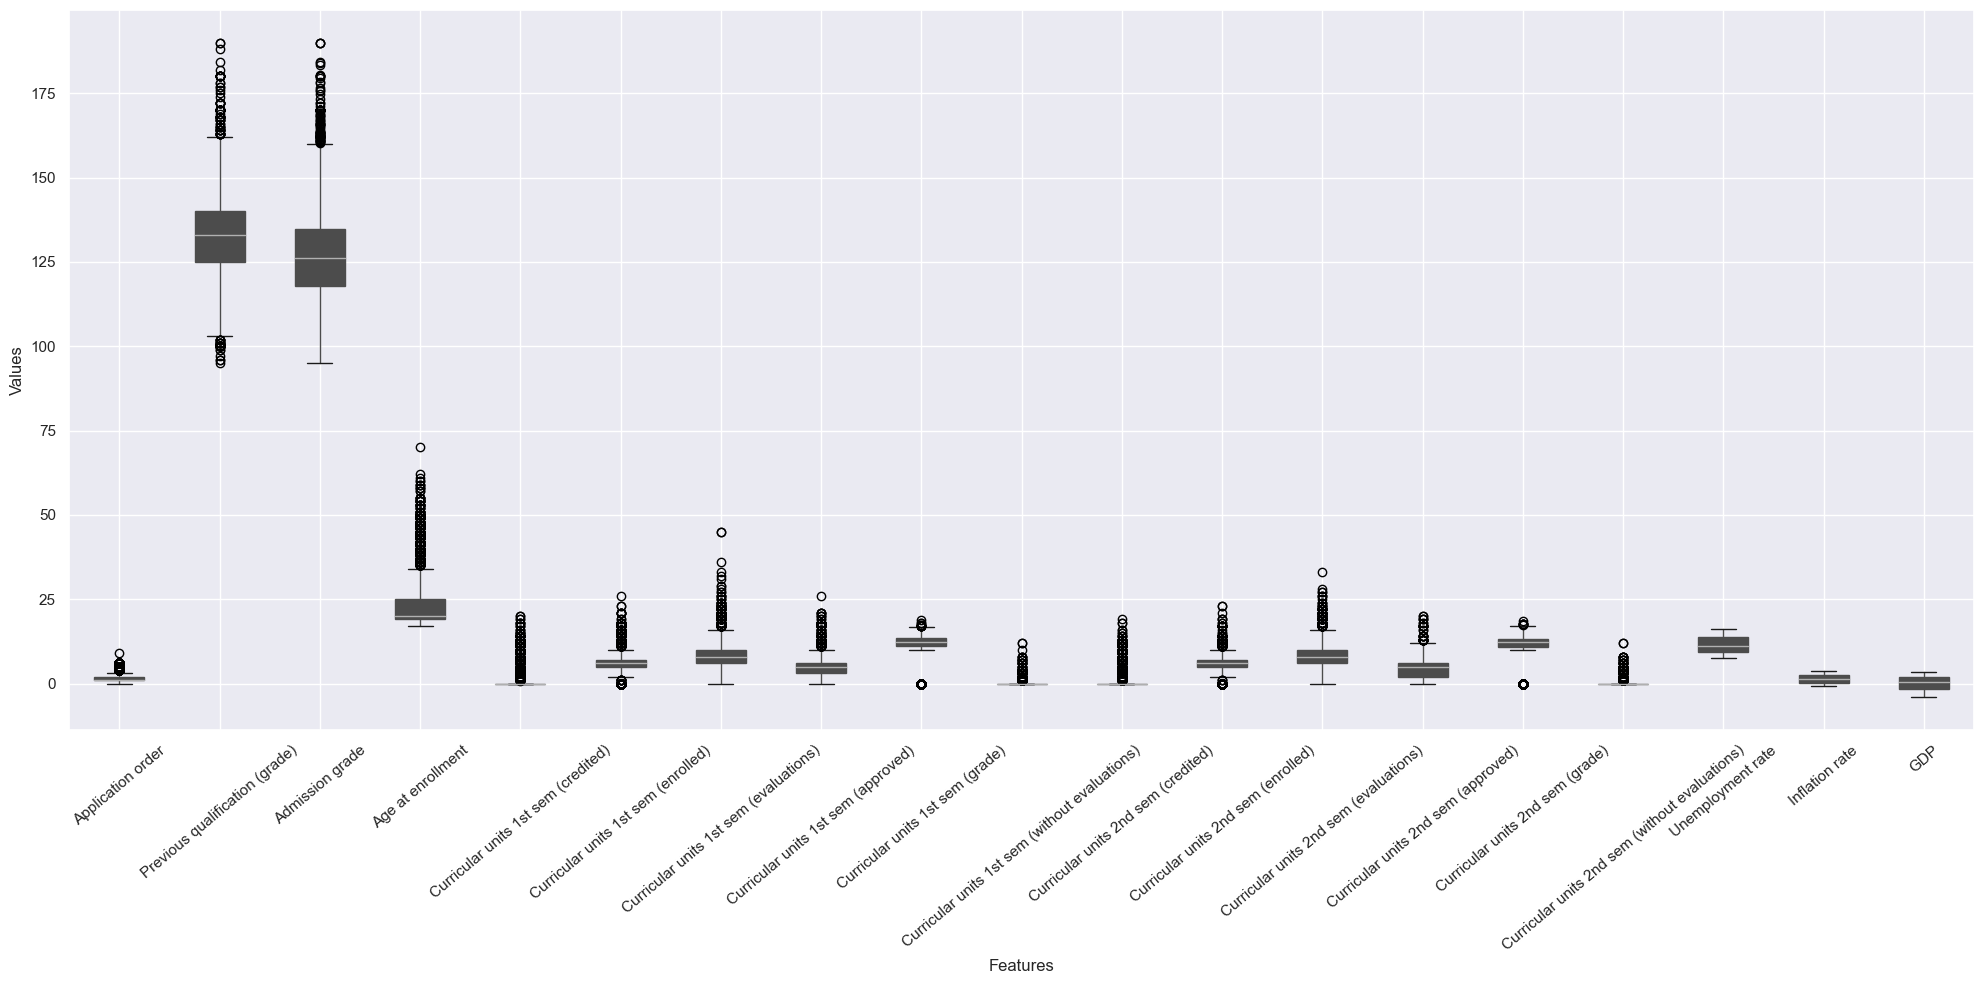

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
boxplot = selected_columns.boxplot(vert=True, patch_artist=True)
plt.xticks(rotation=40)
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout() 
plt.show()


This box plot allows us to track the general tendencies of our data set. It illustrates a statistics summary for each feature in the data set. However, it may be difficult to read all the data from that general plot. So, if we need to take a look at any specific feature, we can plot it separately as shown below.

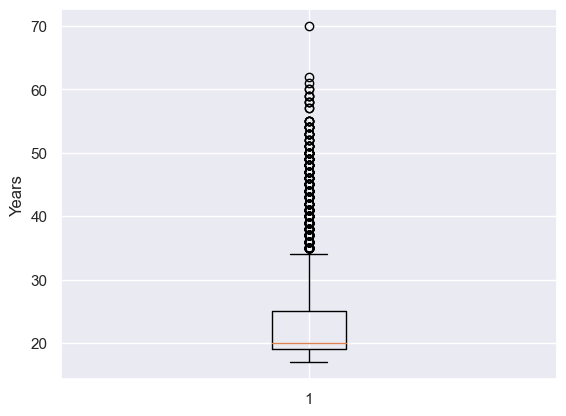

In [61]:
plt.boxplot(df_studens['Age at enrollment'])
plt.ylabel('Years')
plt.show()

Basically, the boxplot summarises all essential statistical Information about selected data.
- The box (rectangle) represents a standard deviation (Second and third quartiles). This part represents the whole sample.
- The line inside of the box represents the median and indicates how data is spread. It may be described as a spot of balance where two sides of the dataset are even. We can that the lower part is much "heavier" than the upper part (half of all students enrolled before their 20s).
- The whiskers on both sides represent the first and fourth quartiles and identify approximately 25% of the sample each. They are less important because they do not represent the sample as accurately as the second and third quartiles, but still important for understanding how the sample is spread.
- The small circles represent outliers. It is a single or group of records which do not follow the pattern or rules. In many cases, they are being excluded from consideration because they may affect analysis and add some noise.

Below is a picture from https://web.pdx.edu/~stipakb/download/PA551/boxplot.html. It clearly explains all parts of the boxplot.

<center>
    <img src="https://web.pdx.edu/~stipakb/download/PA551/boxplot_files/boxplot5.jpg" width="500" />
</center>

<a id="section18"></a>
### Histogram 

Histograms may be considered as a visual extension for the boxplot. It represents the same information in a slightly different way. Instead of summarising statistical information, it builds 2 dimentional charts and visually shows distribution and tendency 

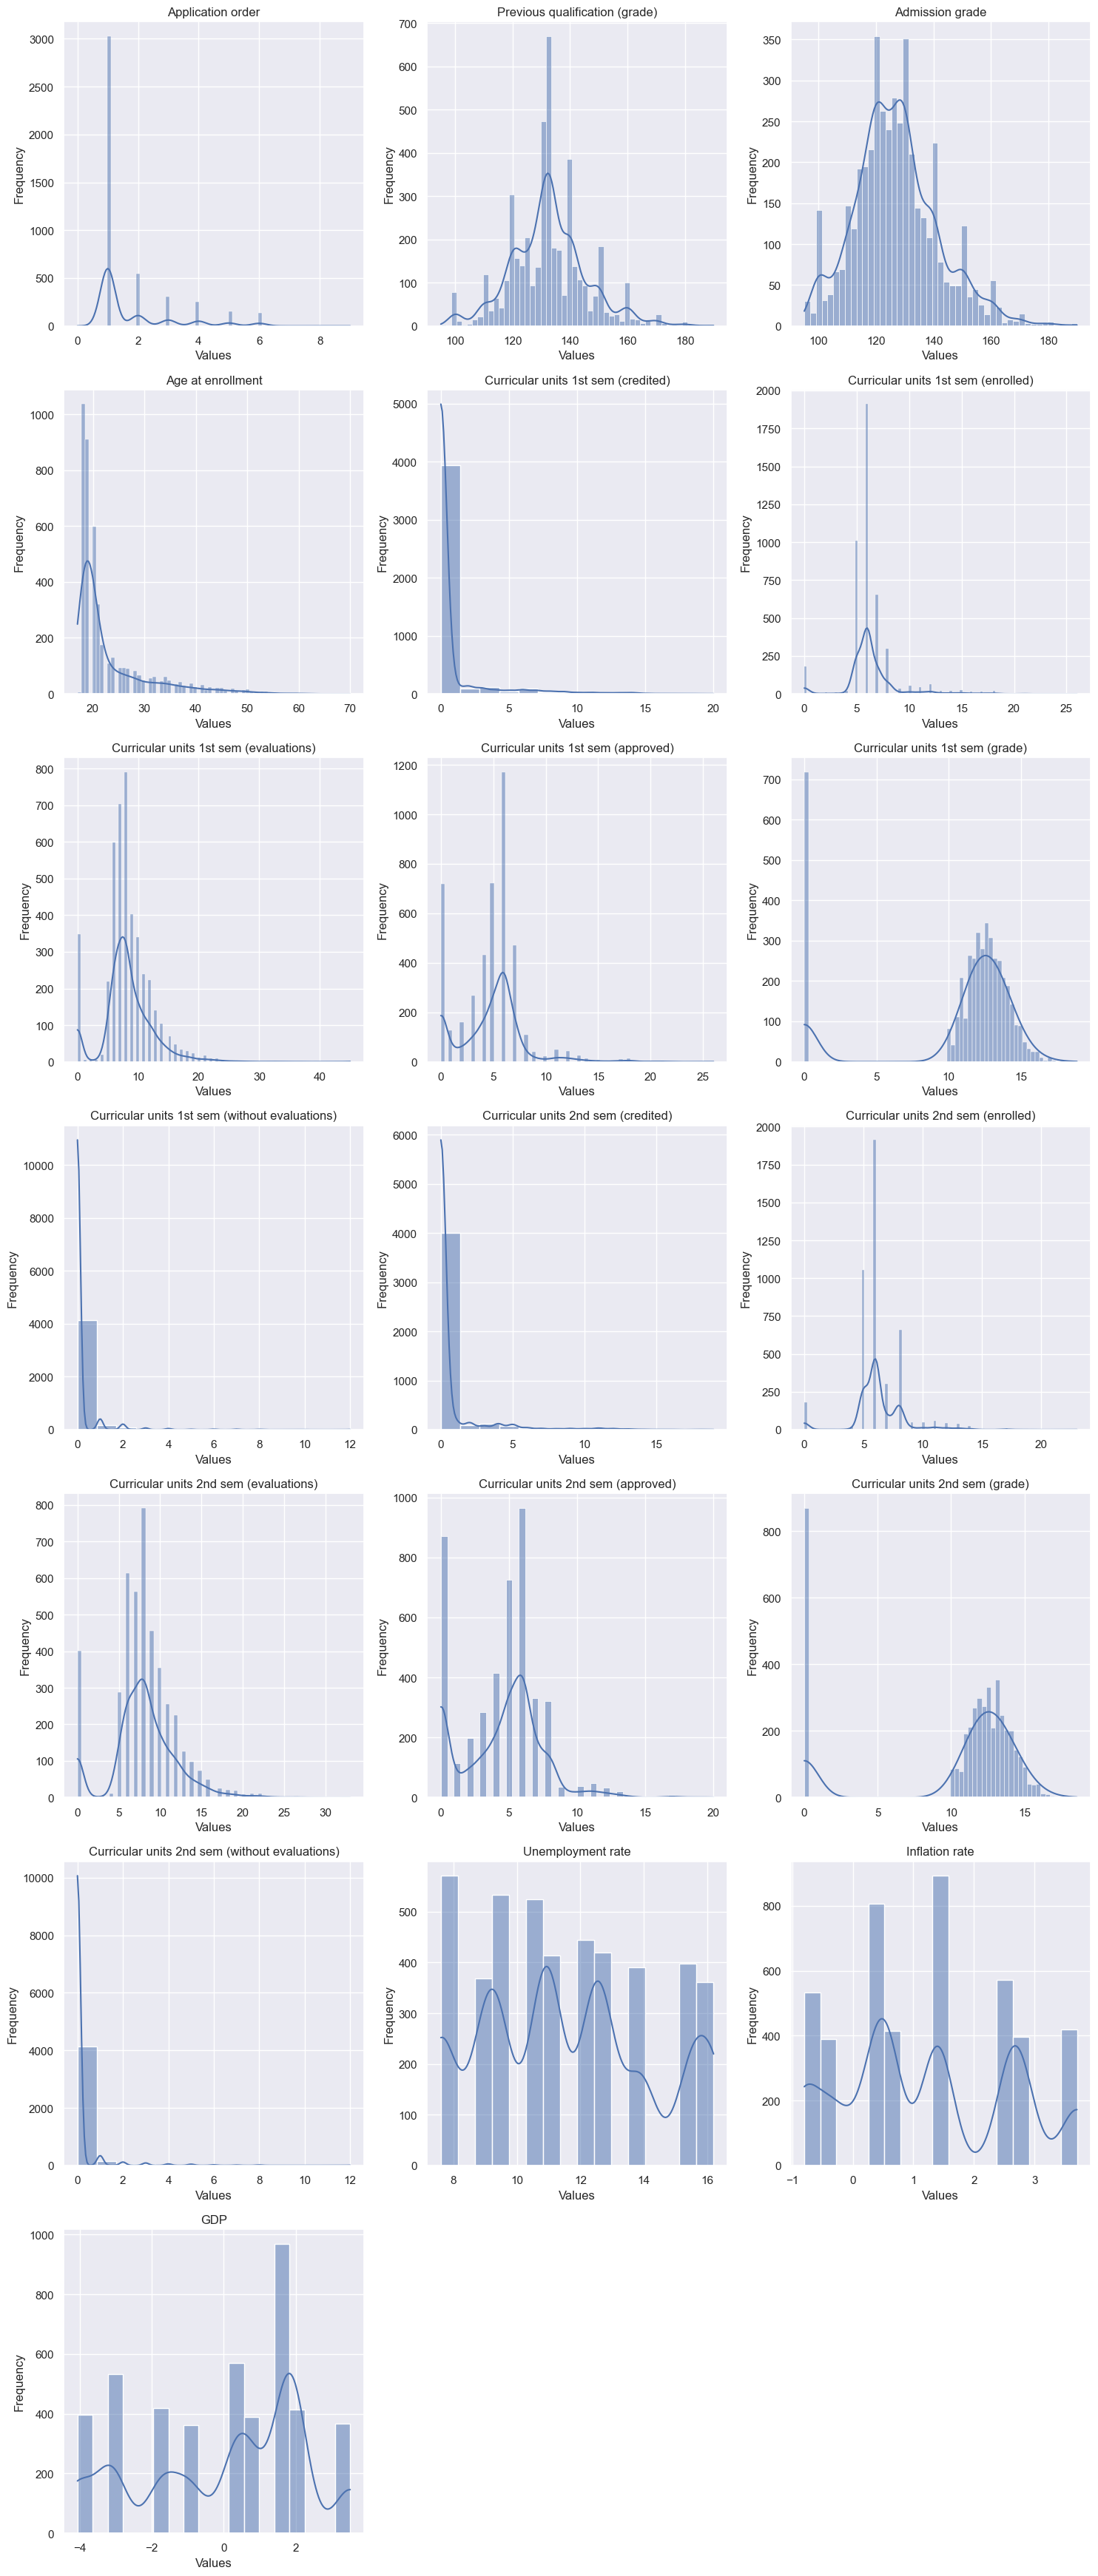

In [62]:

import seaborn as sns

selected_columns = df_studens.iloc[:, value_indices]

num_cols = 3  

num_features = len(value_indices)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, col_index in enumerate(value_indices):
    ax = axes[i]
    col_name = df_studens.columns[col_index]
    sns.histplot(df_studens.iloc[:, col_index], ax=ax, kde=True)
    ax.set_title(col_name)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()


<a id="section19"></a>
### Heatmap for numeric features

The heatmap is a very useful tool for discovering relationships between features. It shows a correlation between two features. Using this tool we can define a scope for deeper investigation or modeling. For example, if we take a look at the second heat map we can choose the dependent variable "Target" and define independent features which make the biggest impact. In this case day/evening attendance and scholarship influence the dependent feature the most.

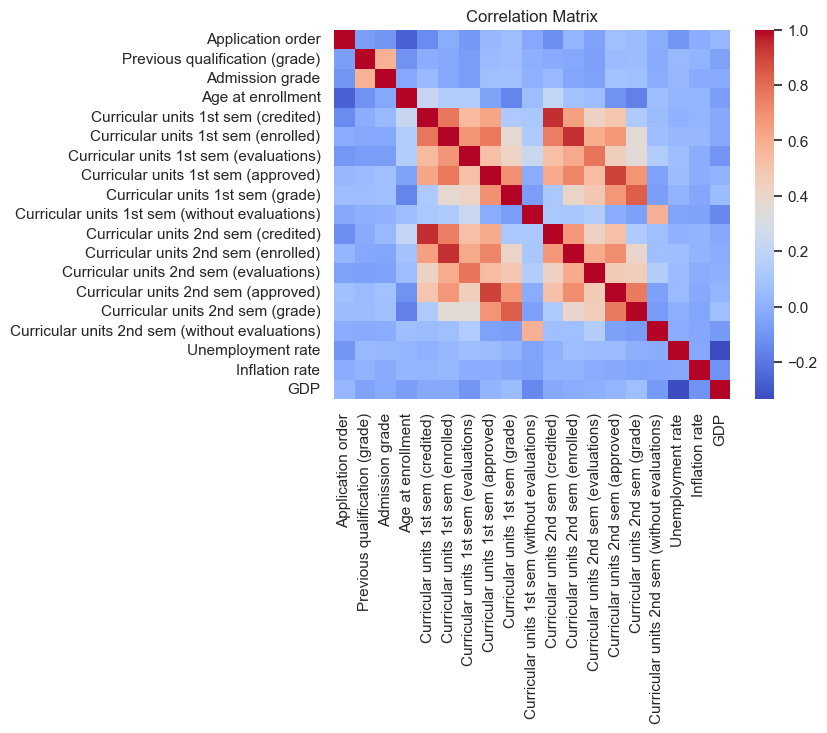

In [63]:
sns.heatmap(selected_columns.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<a id="section20"></a>
### Heatmap for non-numeric features

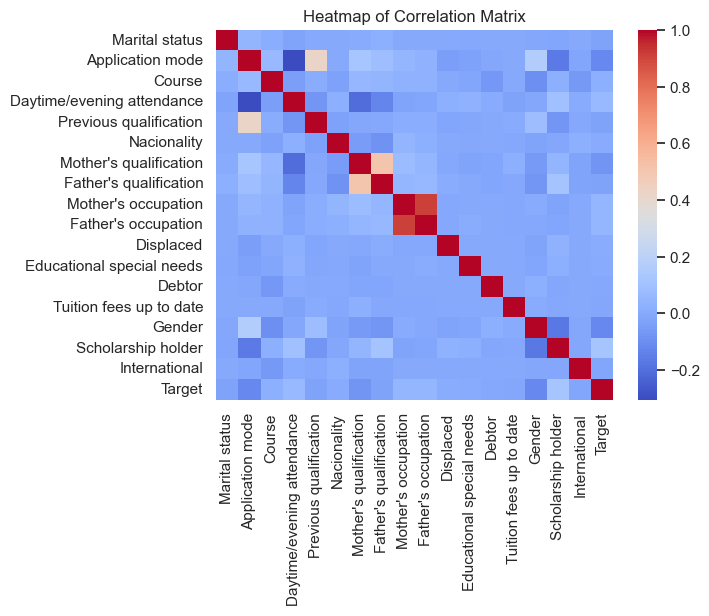

In [64]:
sns.heatmap(selected_columns2.corr(), cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

<a id="section21"></a>
### Heatmap for all features

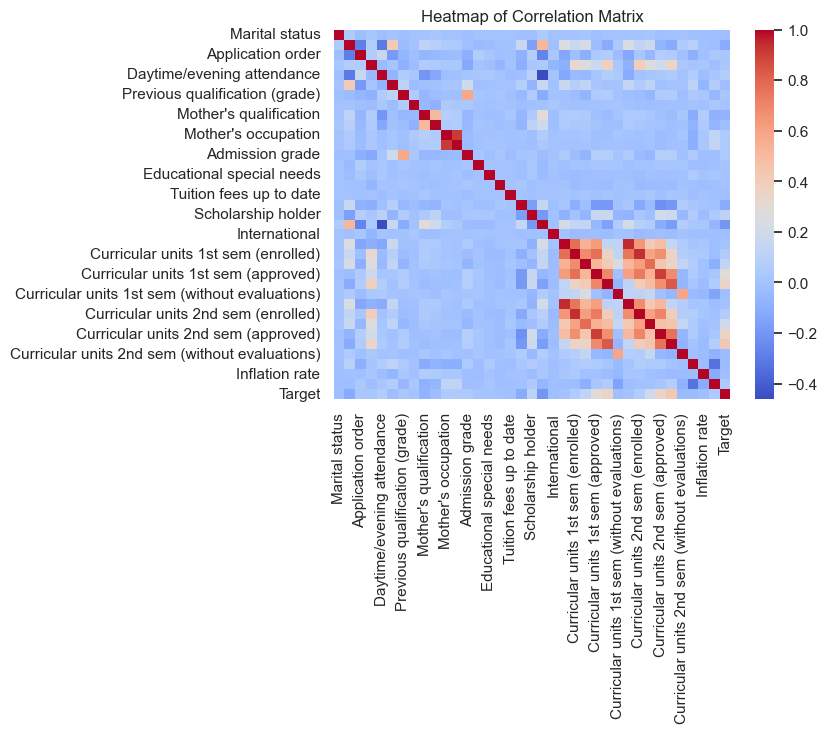

In [65]:
sns.heatmap(df_studens.corr(), cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()



<a id="section22"></a>
### Bar chart

Barchart may look like a histogram chart. To some extent it is the same chart but for categorical data. For each feature number of unique values is determined by several categories. In contrast to numeric data where all values are unique except some repetitions. So, the bar chart summarises all categories in selected data and shows how many records of each category in the dataset. It may be very helpful if we want to see the ratio in frequency.

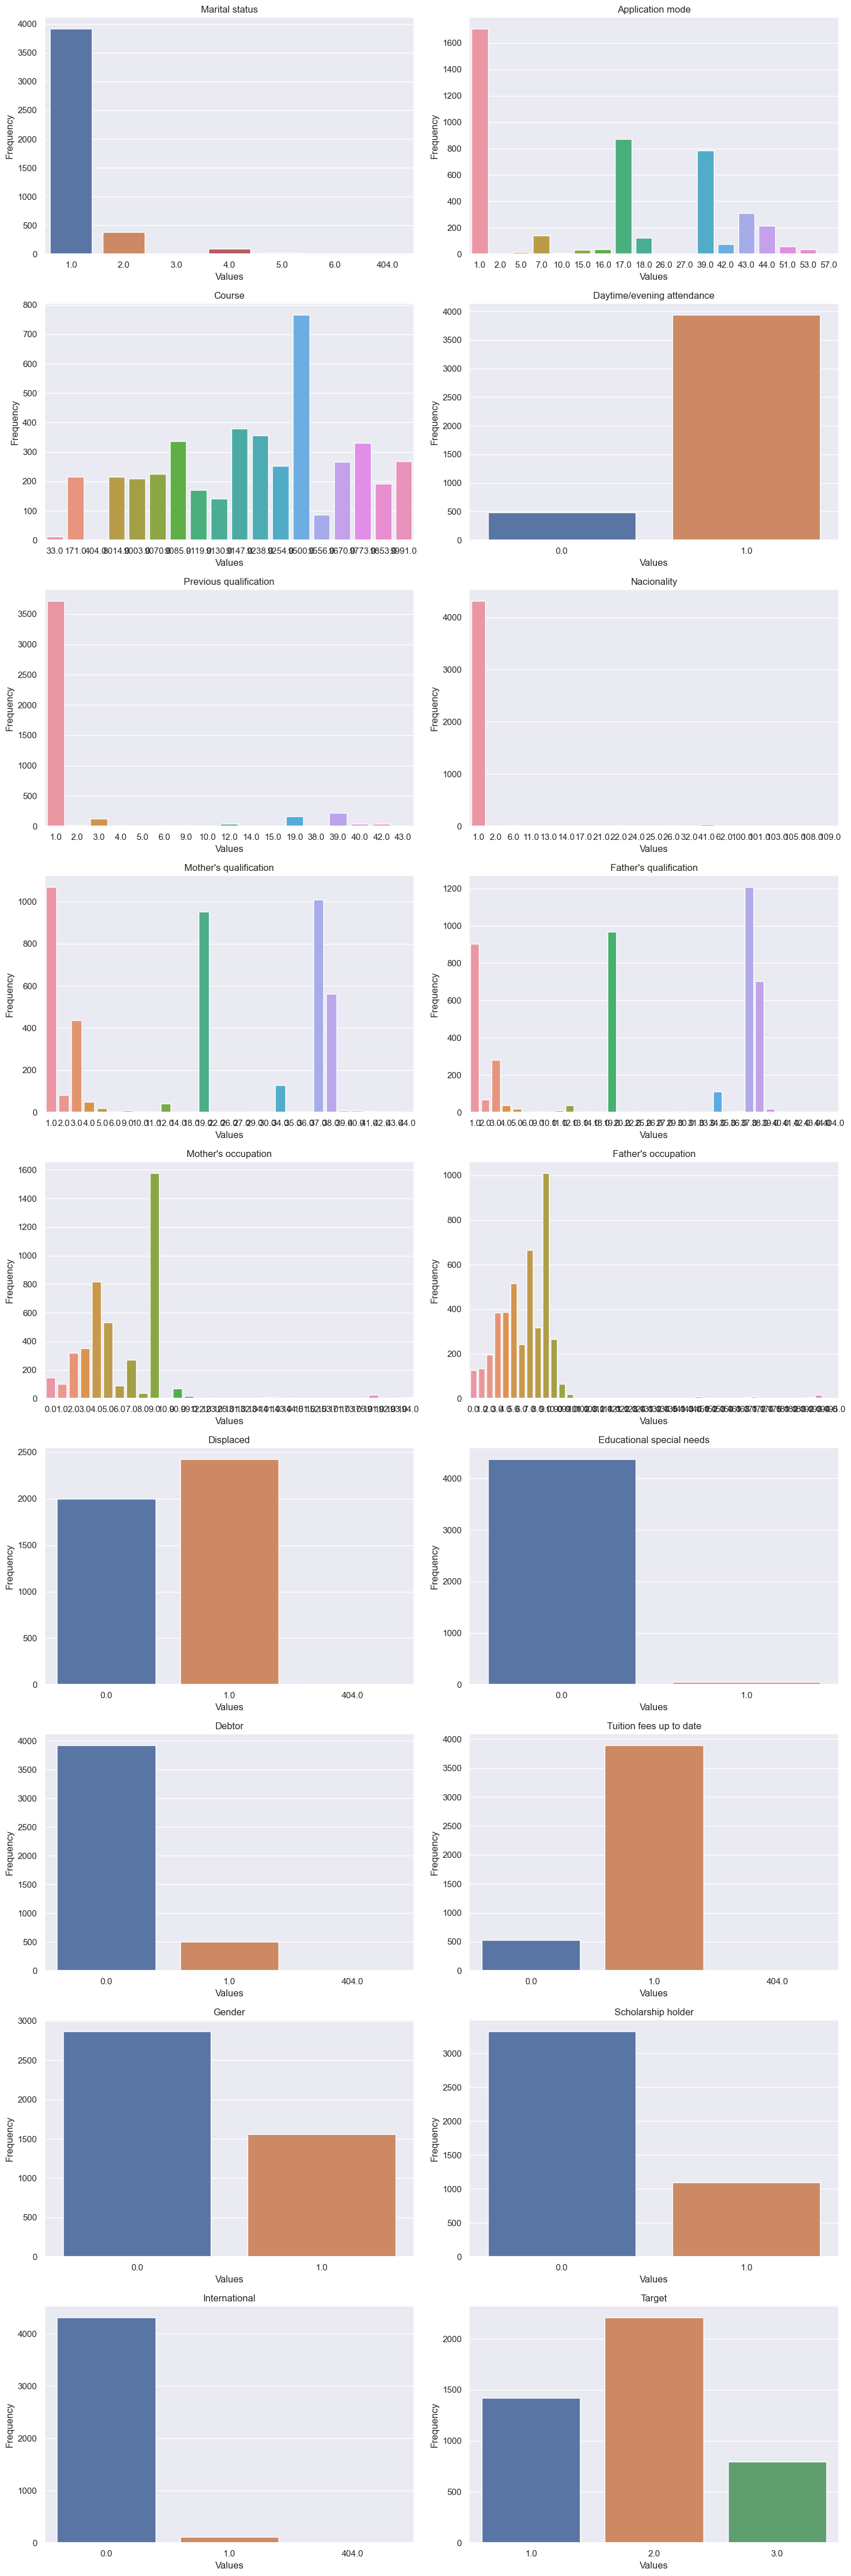

In [66]:
num_cols = 2  
num_features = len(key_indices)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, col_index in enumerate(key_indices):
    ax = axes[i]
    col_name = df_studens.columns[col_index]
    sns.countplot(x=col_name, data=df_studens, ax=ax)
    ax.set_title(col_name)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()


<a id="section230"></a>
## PCA Preparation
At this stage we arre going to perform PCA. However before PCA itself, we will train several classification models in order to evaluate the impact of PCA for each model.
 

Create a dataframe for storing models' results before perfoming PCA

In [67]:
before_PCA = pd.DataFrame(columns=['Model', 'Accuracy'])

Define target feature

In [68]:
X=df_studens.drop(columns=['Target'],axis = 1)
y=df_studens['Target']

Split both samples

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Decision Tree Classifier

In [70]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth = 5, random_state = 42)
model_tree = model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
before_PCA = before_PCA.append({'Model': 'Decision Tree', 'Accuracy': accuracy_score}, ignore_index=True)
print("Accuracy Desition Tree:",metrics.accuracy_score(y_test, y_pred))

Accuracy Desition Tree: 0.740506329113924


#### Support vector machine

In [71]:
svc_model = SVC()
svc_model = svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
before_PCA = before_PCA.append({'Model': 'SVC', 'Accuracy': accuracy_score}, ignore_index=True)
print("Accuracy Support vector machine:",metrics.accuracy_score(y_test, y_pred))

Accuracy Support vector machine: 0.4837251356238698


#### Random Forest

In [72]:
model_rf = RandomForestClassifier(n_estimators = 1000)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
before_PCA = before_PCA.append({'Model': 'Random Forest', 'Accuracy': accuracy_score}, ignore_index=True)
print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred))

Accuracy Random Forest: 0.7694394213381555


#### KNN

In [73]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
before_PCA = before_PCA.append({'Model': 'KNN', 'Accuracy': accuracy_score}, ignore_index=True)
print("Accuracy KNN:",metrics.accuracy_score(y_test, y_pred))

Accuracy KNN: 0.6066907775768535


#### Naive Bayes

In [74]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
before_PCA = before_PCA.append({'Model': 'NB', 'Accuracy': accuracy_score}, ignore_index=True)
print("Accuracy Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

Accuracy Naive Bayes: 0.5922242314647378


#### Logistic Regression

In [75]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
before_PCA = before_PCA.append({'Model': 'Liniar Classifier', 'Accuracy': accuracy_score}, ignore_index=True)
print("Accuracy Logistic Regression:",metrics.accuracy_score(y_test, y_pred))

Accuracy Logistic Regression: 0.6681735985533453


<a id="section23"></a>
## Principal Component Analysis (PCA)

Principal Component Analysis is the process of extracting the most relevant dataset features. Very useful tool for machine learning models because it reduces the number of features which make a very low impact or even none, allowing the to model focus only on relevant data without distractors.

Centring and scaling dataset. Basically, this process reduces the distance between records but saves their relationships. After centring an average value equals zero, meanwhile after scaling standard deviation equals To do that we will use imported from **sklearn** function **preprocessing**



In [76]:
df_scaled = preprocessing.scale(X)

Create a PCA object and use the fit method to make a calculation. It extracts the score and a variation for each component.

In [77]:
pca = PCA()
pca.fit(df_scaled)
pca_data = pca.transform(df_scaled)

<a id="section24"></a>
### Variance ratio

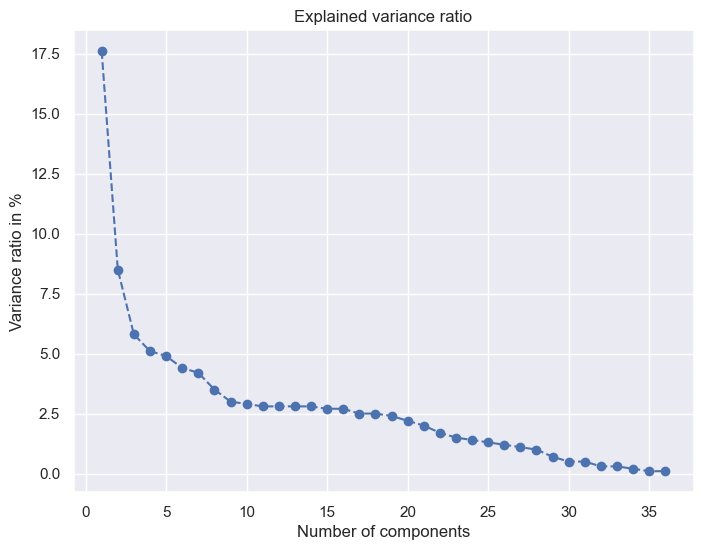

In [78]:
variations = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range (1, len(variations)+1)]

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(variations) + 1), 
         variations, marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Variance ratio in %')
plt.title('Explained variance ratio')
plt.grid(True)
plt.show()



So, here we can clearly see how each component contributes to the general sample. In other words, if we keep only several features with a higher percentage of contribution we will be able to extract approximately 50% of signals hidden in the dataset. However, for accurate identification of the exact number of components we make another chart.

<a id="section25"></a>
### Cumulative explained variance

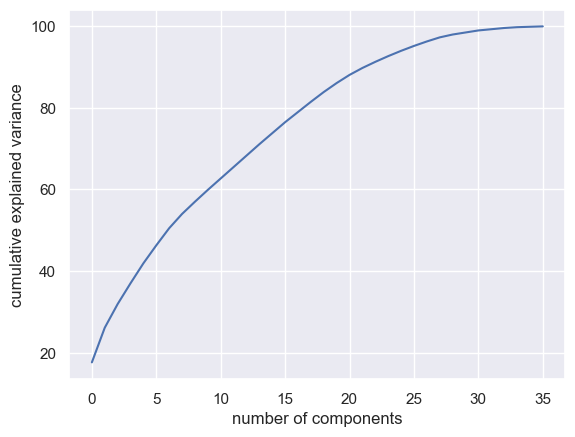

In [79]:
plt.plot(np.cumsum(variations)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');

In this case, we can notice that around 30-32 out of 36 components contribute. However, depending on the purposes of further analysis and characteristics of data, the cumulative explained variance ratio may vary from 70 to 100%.
In our case, if we keep 33 out of 36 components we will save 99.5% of variance. 

In [80]:
variance_ratio_percentage = 99.5
variance_ratio = np.cumsum(variations)
num_components = np.argmax(variance_ratio >= variance_ratio_percentage) + 1
print("Percentage of variance:", variance_ratio_percentage)
print("Number of components:", num_components)

Percentage of variance: 99.5
Number of components: 33


<a id="section26"></a>
### Select Principal Components

In [81]:
abs_loadings = np.abs(pca.components_)

importance_scores = np.sum(abs_loadings, axis=0)

variance_ratios = variations

feature_variance = {}
num = 3
for i, (feature_name, variance_ratio) in enumerate(zip(df_studens.columns, variance_ratios)):
    feature_variance[feature_name] = variance_ratio

sorted_feature_variance = dict(sorted(feature_variance.items(), key=lambda item: item[1], reverse=True))

most_important_features = list(sorted_feature_variance.items())[:num_components]

for feature, variance_ratio in most_important_features:
    print(f"Feature: {feature}, Variance Ratio: {variance_ratio:.1f}%")


Feature: Marital status, Variance Ratio: 17.6%
Feature: Application mode, Variance Ratio: 8.5%
Feature: Application order, Variance Ratio: 5.8%
Feature: Course, Variance Ratio: 5.1%
Feature: Daytime/evening attendance, Variance Ratio: 4.9%
Feature: Previous qualification, Variance Ratio: 4.4%
Feature: Previous qualification (grade), Variance Ratio: 4.2%
Feature: Nacionality, Variance Ratio: 3.5%
Feature: Mother's qualification, Variance Ratio: 3.0%
Feature: Father's qualification, Variance Ratio: 2.9%
Feature: Mother's occupation, Variance Ratio: 2.8%
Feature: Father's occupation, Variance Ratio: 2.8%
Feature: Admission grade, Variance Ratio: 2.8%
Feature: Displaced, Variance Ratio: 2.8%
Feature: Educational special needs, Variance Ratio: 2.7%
Feature: Debtor, Variance Ratio: 2.7%
Feature: Tuition fees up to date, Variance Ratio: 2.5%
Feature: Gender, Variance Ratio: 2.5%
Feature: Scholarship holder, Variance Ratio: 2.4%
Feature: Age at enrollment, Variance Ratio: 2.2%
Feature: Interna

<a id="section261"></a>
### Transform dataset

In [82]:
pca = PCA(n_components=33)
pca.fit(df_scaled)
X_pca = pca.transform(df_scaled)
print("original shape: ", df_scaled.shape) 
print("transformed shape:", X_pca.shape)

original shape:  (4424, 36)
transformed shape: (4424, 33)


<a id="section232"></a>
### PCA Evaluation 
Now after we have got optimal number of components to keep 99.5% of signals and tranformed our independent sample, we can condact the third part. We are going to apply the same models as we did in the PCA preparation section but as a independent sample this time we will our transformed by PCA sample. As well as before we will record result.

In [83]:
after_PCA = pd.DataFrame(columns=['Model', 'Accuracy'])

In [84]:
X=X_pca
y=df_studens['Target']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Decision Tree Classifier

In [86]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth = 5, random_state = 42)
model_tree = model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
after_PCA = after_PCA.append({'Model': 'Decision Tree', 'Accuracy': accuracy_score}, ignore_index=True)
print("Accuracy Desition Tree:",metrics.accuracy_score(y_test, y_pred))

Accuracy Desition Tree: 0.6708860759493671


#### Support vector machine

In [87]:
svc_model = SVC()
svc_model = svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
after_PCA = after_PCA.append({'Model': 'SVC', 'Accuracy': accuracy_score}, ignore_index=True)
print("Accuracy Support vector machine:",metrics.accuracy_score(y_test, y_pred))

Accuracy Support vector machine: 0.7368896925858951


#### Random Forest

In [88]:
model_rf = RandomForestClassifier(n_estimators = 1000)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
after_PCA = after_PCA.append({'Model': 'Random Forest', 'Accuracy': accuracy_score}, ignore_index=True)
print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred))

Accuracy Random Forest: 0.7305605786618445


#### KNN

In [89]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
after_PCA = after_PCA.append({'Model': 'KNN', 'Accuracy': accuracy_score}, ignore_index=True)
print("Accuracy KNN:",metrics.accuracy_score(y_test, y_pred))

Accuracy KNN: 0.6708860759493671


#### Naive Bayes

In [90]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
after_PCA = after_PCA.append({'Model': 'NB', 'Accuracy': accuracy_score}, ignore_index=True)
print("Accuracy Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

Accuracy Naive Bayes: 0.5379746835443038


#### Logistic Regression

In [91]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
after_PCA = after_PCA.append({'Model': 'Liniar Classifier', 'Accuracy': accuracy_score}, ignore_index=True)
print("Accuracy Logistic Regression:",metrics.accuracy_score(y_test, y_pred))

Accuracy Logistic Regression: 0.7296564195298373


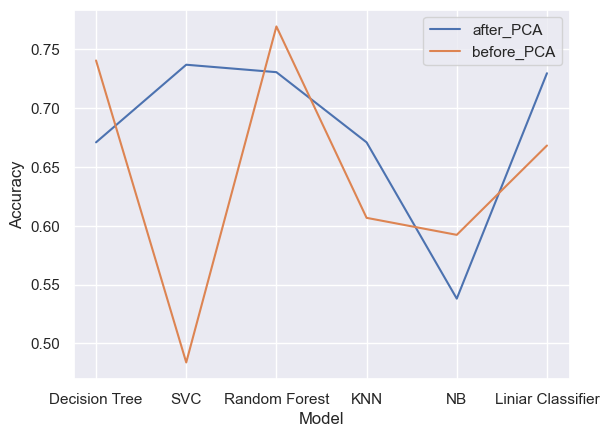

In [92]:
plt.plot(after_PCA['Model'], after_PCA['Accuracy'], label='after_PCA')
plt.plot(before_PCA['Model'], before_PCA['Accuracy'], label='before_PCA')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### The curse of dimensionality and PCA

The curse of dimensionality presents an issue related to several possible variants within a data set.
Each feature in a dataset reflects a dimension where data is being placed. As far as I understand it is called "the curse" because both computer's and human's abilities to make calculations are limited. And although computers have thousands of times more computing power than human brains, it still may be difficult for them to perform some work. So the curse is hidden in a large number of variations which computers must compare to each other. 
Another inconvenience may be related to the noise produced by features with a low variance. In other words, it can not make a result as accurate as it might be. It can be vividly seen in photo recognition models where many pixels on the photo have nothing to do with the object we need to recognise. Those pixels add a noise which may affect the final result.

For simplifying "The curse of dimensionality" I would like to compare it with real-world scenarios which may take place.
For example, I go to the store to buy a bottle of milk, in this case, I represent an object which has to provide some calculation efforts.
- 0 dimensions:
After I had entered the store I realised that there was just one bottle of milk for the entire store. I will get it without any hesitation because there is nothing to compare with.
- 1 dimension:
Some brands sell the same milk for slightly different prices. It is also quite simple, but now I need to choose, in other words, make a simple calculation which will provide a conclusion.
- 2 dimensions:
This time I came to the store and I could see that companies were obligated to print expiry dates which already required staring at the shelf for a while and making a conclusion about the best deal.
- 3 dimensions: 
In this case, buying a bottle of milk will require having a diploma in mathematics because companies added different percentages of fat. This makes this calculation more difficult because most of the features collate with each other.
- 4+ dimensions:
With each new dimension added, it becomes more difficult to focus on features of the product which matter to us. And very often there may be a mistake in analysis. For example, I can easily fall for well well-designed package which represents the noise in data, instead of focusing on features which important.

I think all of us have ever experienced the curse of dimensionality. It may be very stressful because human abilities are very limited, but sometimes we need to find the best option or way with hundreds or thousands of variations. For example, buying a house or a car, choosing a career or a college, exploring potential spots for holidays or picking a dinner recipe. All of those require some calculation and focusing on only important aspects.

However, both computer science and the market have developed a solution for this problem. In computer science, it is called PCA Principal Component Analysis. This method allows to capture of the most relevant dataset features. It is a very useful tool which helps to save memory by reducing the number of features with less important, decreasing requirements for calculating power. Also, the method allows us to get rid of the noise and make results more accurate.

In terms of the market, PCA may be perceived as an agency in some specific industry. If I want/can buy a house, I go to a real estate agency and give them the most relevant features of the house, such as range of price, location, condition, and size. Based on the principal components I provided agency reduces the general number of houses available and summarises for me only those which resonate with my preferences.

<a id="section28"></a>
## Optional part (relational database)

The aim of this stage is dividing dictionary dataset into separate table which will provide defenitions for table with student data.

It was established that row data in the cells which contains keys and their definitions has no delimitation. Considering it we need to use library re which provides a syntax for determining delimiters manually. 

<a id="section29"></a>
### Extract data with keys

In [ ]:
import re
def replace_text(text):  
    text = text.replace("No. ", "No.")
    text = text.replace("–", "-")
    return text

original_table = pd.read_excel("student_data_dictionary.xlsx")

row_index = 1
column_name = 'Description'

text = original_table.at[row_index, column_name]

text = replace_text(text)
print(text)

The biggest challenge in this stage is defining patterns which will capture elements in the exact order which we need and without losing data. To simplify this task I decreased the number of variables which need to be included in the pattern by deleting an extra space in one of the elements in the previous cell.
After getting the pattern, we create a new variable and store there all elements.

<a id="section30"></a>
### Apply a pattern

In [ ]:
pattern2 = r'(\d+)\s*-\s*(.*?)\s(?=\d+\s*-|\Z)'
pattern = r'(\d+)\s*-\s*(.*?)\s*(?=\d+\s*-|\Z)'

matches = re.findall(pattern2, text)
print(matches)

The cell which represents a key feature "Application mode" contains symbols which can't be recognised by pattern. So we have modified that pattern and stored it as a pattern2. Further, we will apply a loop for separating data using pattern1 which works with most of the cells.
As we can see data was stored properly.
So now we need to create a list and name the features for further storing.

<a id="section31"></a>
### Create a new table with keys

In [ ]:
data = [{'Key': match[0], 'Definition': match[1]} for match in matches]
print(data)

In [ ]:
student_data1 = pd.DataFrame()
student_data1 = pd.concat([student_data1, pd.DataFrame(data)], ignore_index=True)
student_data1.head(30)

As a result, we have a table which represents the definitions for each key in the student table.
We can store that table as a variable and work with that table directly or firstly we can save it as a CSV file. I think the second approach will help for further work. We are going to name tables after the columns they represent, it will help us not only get lost in multiple tables but also merge data.

In [ ]:
import os
folder_path = '/Users/iliagrishkin/Assignments/Data preparation/Prepared tables'
# os.makedirs(folder_path)

In [ ]:
column_name2 = 'Variable Name'
table_name = original_table.at[row_index, column_name2]
file_path = os.path.join(folder_path, f"{table_name}.csv")
student_data1.to_csv(file_path, index=False)
print(table_name)

Once we made sure that the table was stored properly we can write a loop function which will perform the same operation with each cell. However, before that, we need to take a look at our dictionary table to identify rows which contain keys and make a list of them.

<a id="section32"></a>
### Extracting with a loop

We excluded two records from the list (1, 4). The first one is because we already stored data by applying different patterns. The second one is because the name of the column contains symbols from python syntax where "/" is recognised as the path. However, I think we should change the name before we launch the loop.

In [ ]:
specific_row_indices = [0, 3, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20]

In [ ]:
original_table = pd.read_excel("student_data_dictionary.xlsx")

row_index = 4
column_name = 'Description'

text = original_table.at[row_index, column_name]
text = replace_text(text)
pattern = r'(\d+)\s*-\s*(.*?)\s*(?=\d+\s*-|\Z)'
matches = re.findall(pattern, text)
data = [{'Key': match[0], 'Definition': match[1]} for match in matches]
student_data1 = pd.DataFrame()
student_data1 = pd.concat([student_data1, pd.DataFrame(data)], ignore_index=True)

def change_name(text):  
    text = text.replace("/", "-")
    return text

column_name2 = 'Variable Name'

text = original_table.at[row_index, column_name2]

text = change_name(text)
    
filename = f"{text}"

file_path = os.path.join(folder_path, f"{filename}.csv")
student_data1.to_csv(file_path, index=False)

print(f"'{filename}'created")

In [ ]:
for row_index in specific_row_indices:
    
    text = original_table.at[row_index, column_name]
    text = replace_text(text)
    pattern = r'(\d+)\s*-\s*(.*?)\s*(?=\d+\s*-|\Z)'

    matches = re.findall(pattern, text)

    data = [{'Key': match[0], 'Definition': match[1]} for match in matches]
    student_data1 = pd.DataFrame(data)

    table_name = original_table.at[row_index, column_name2]
    
    filename = f"{table_name}"

    file_path = os.path.join(folder_path, f"{filename}.csv")
    student_data1.to_csv(file_path, index=False)

    print(f"'{filename}'created")

In [ ]:
df_International = pd.read_csv("/Users/iliagrishkin/Assignments/Data preparation/Prepared tables/International.csv")
df_International.head(10)

In [ ]:
df_Fathers_qualification = pd.read_csv("/Users/iliagrishkin/Assignments/Data preparation/Prepared tables/Father's qualification.csv")
df_Fathers_qualification.head(10)

As we can see we successfully prepared data for our next stage.

<a id="section33"></a>
### Add keys for missing values

In [ ]:
import os
files = os.listdir(folder_path)
print(files)


We need to assign one more category for each table with primary keys we have just created. This key will represent all missing values.  

In [ ]:
new_record = {'Key': '404', 'Definition': 'Unknown'} 
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df = df.append(new_record, ignore_index=True)
    df.to_csv(file_path, index=False)

***

<a id="section34"></a>
### Author: Ilia Grishkin
#### https://github.com/Ilia-Grishkin/Data_Preparation
#### https://github.com/CCT-Dublin/data-preparation-ca1-Ilia-Grishkin
### <center>Change log</center>

|  Date | Change Description | Changed By  |  Status |
|---|---|---|---|
| 09.03.2024  | Prereviewed | Ilia  |  Pushed |
| 11.03.2024   | The curse of dimensionality and PCA | Ilia |  Pushed |
| 14.03.2024   | Separating dictionary table (preparation) | Ilia  |  Pushed |
| 15.03.2024   | Separating dictionary table | Ilia  |  Pushed |
| 19.03.2024   | Merging tables (preparation) | Ilia  |  Pushed |
| 21.03.2024   | Data preparation, visualisation, content | Ilia  |  Pushed |
| 24.03.2024   | Full PCA | Ilia  |  Pushed |
|  25.03.2024  | Add student info| Ilia  |  Pushed  |
|  27.03.2024 | Organise comments | Ilia  |  Pushed  |
|  29.03.2024 | Spelling, grammar check | Ilia  |  Pushed  |
| 30.03.2024  | Final check  | Ilia  |  Submitted  |